# File and libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath = r'dataset/df_ecom_data_prep_encoded_vcleaned.csv'


file_tag = "Multicategory Store"

# DSLabs functions

In [7]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

%run "data_functions.py" #run notebook with additional functions made by the group and needed for the project


dslabs_functions lodaded
data_functions loaded


# Load

In [8]:
# test_data=True
test_data=False

if test_data==True:

    df=pd.read_csv(filepath)

    # 10% sample
    df=df.sample(frac=0.4, replace=False)
    

else:
    df=pd.read_csv(filepath)

 
target='is_purchase'
target_metric_2='precision'
target_metric='f2'
# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
df.sort_values(by='day', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373925 entries, 168812 to 295223
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code_lvl_1  269349 non-null  float64
 1   category_code_lvl_2  269349 non-null  float64
 2   price                373925 non-null  float64
 3   is_purchase          373925 non-null  int64  
 4   activity_in_session  373925 non-null  float64
 5   week_of_month        373925 non-null  int64  
 6   is_weekend           373925 non-null  int64  
 7   day                  373925 non-null  int64  
 8   brand_value          340955 non-null  float64
 9   product_category     373925 non-null  int64  
 10  time_of_day_sin      373925 non-null  float64
 11  time_of_day_cos      373925 non-null  float64
 12  day_of_week_sin      373925 non-null  float64
 13  day_of_week_cos      373925 non-null  float64
 14  hour_sin             373925 non-null  float64
 15  hour_cos         

In [9]:
df.head()

,category_code_lvl_1,category_code_lvl_2,price,is_purchase,activity_in_session,week_of_month,is_weekend,day,brand_value,product_category,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
168812,0.0,3.0,949.47,0,3.0,1,0,1,779.2,2334,0.624,-0.781,-0.775,-0.632,0.966,0.259,-0.105,0.995
329231,0.0,3.0,254.65,1,3.0,1,0,1,213.0,2134,-0.975,0.221,-0.775,-0.632,-0.866,-0.500,-0.914,0.407
329238,0.0,0.0,17.63,0,12.0,1,0,1,17.0,429,-0.975,0.221,-0.775,-0.632,-0.866,-0.500,0.105,0.995
215713,NaN,NaN,394.13,1,0.0,1,0,1,386.5,37617,-0.975,0.221,-0.775,-0.632,-0.259,-0.966,-0.951,0.309
31957,0.0,0.0,188.94,1,2.0,1,0,1,779.2,757,0.624,-0.781,-0.775,-0.632,1.000,0.000,0.309,0.951


# Missing Values Analysis

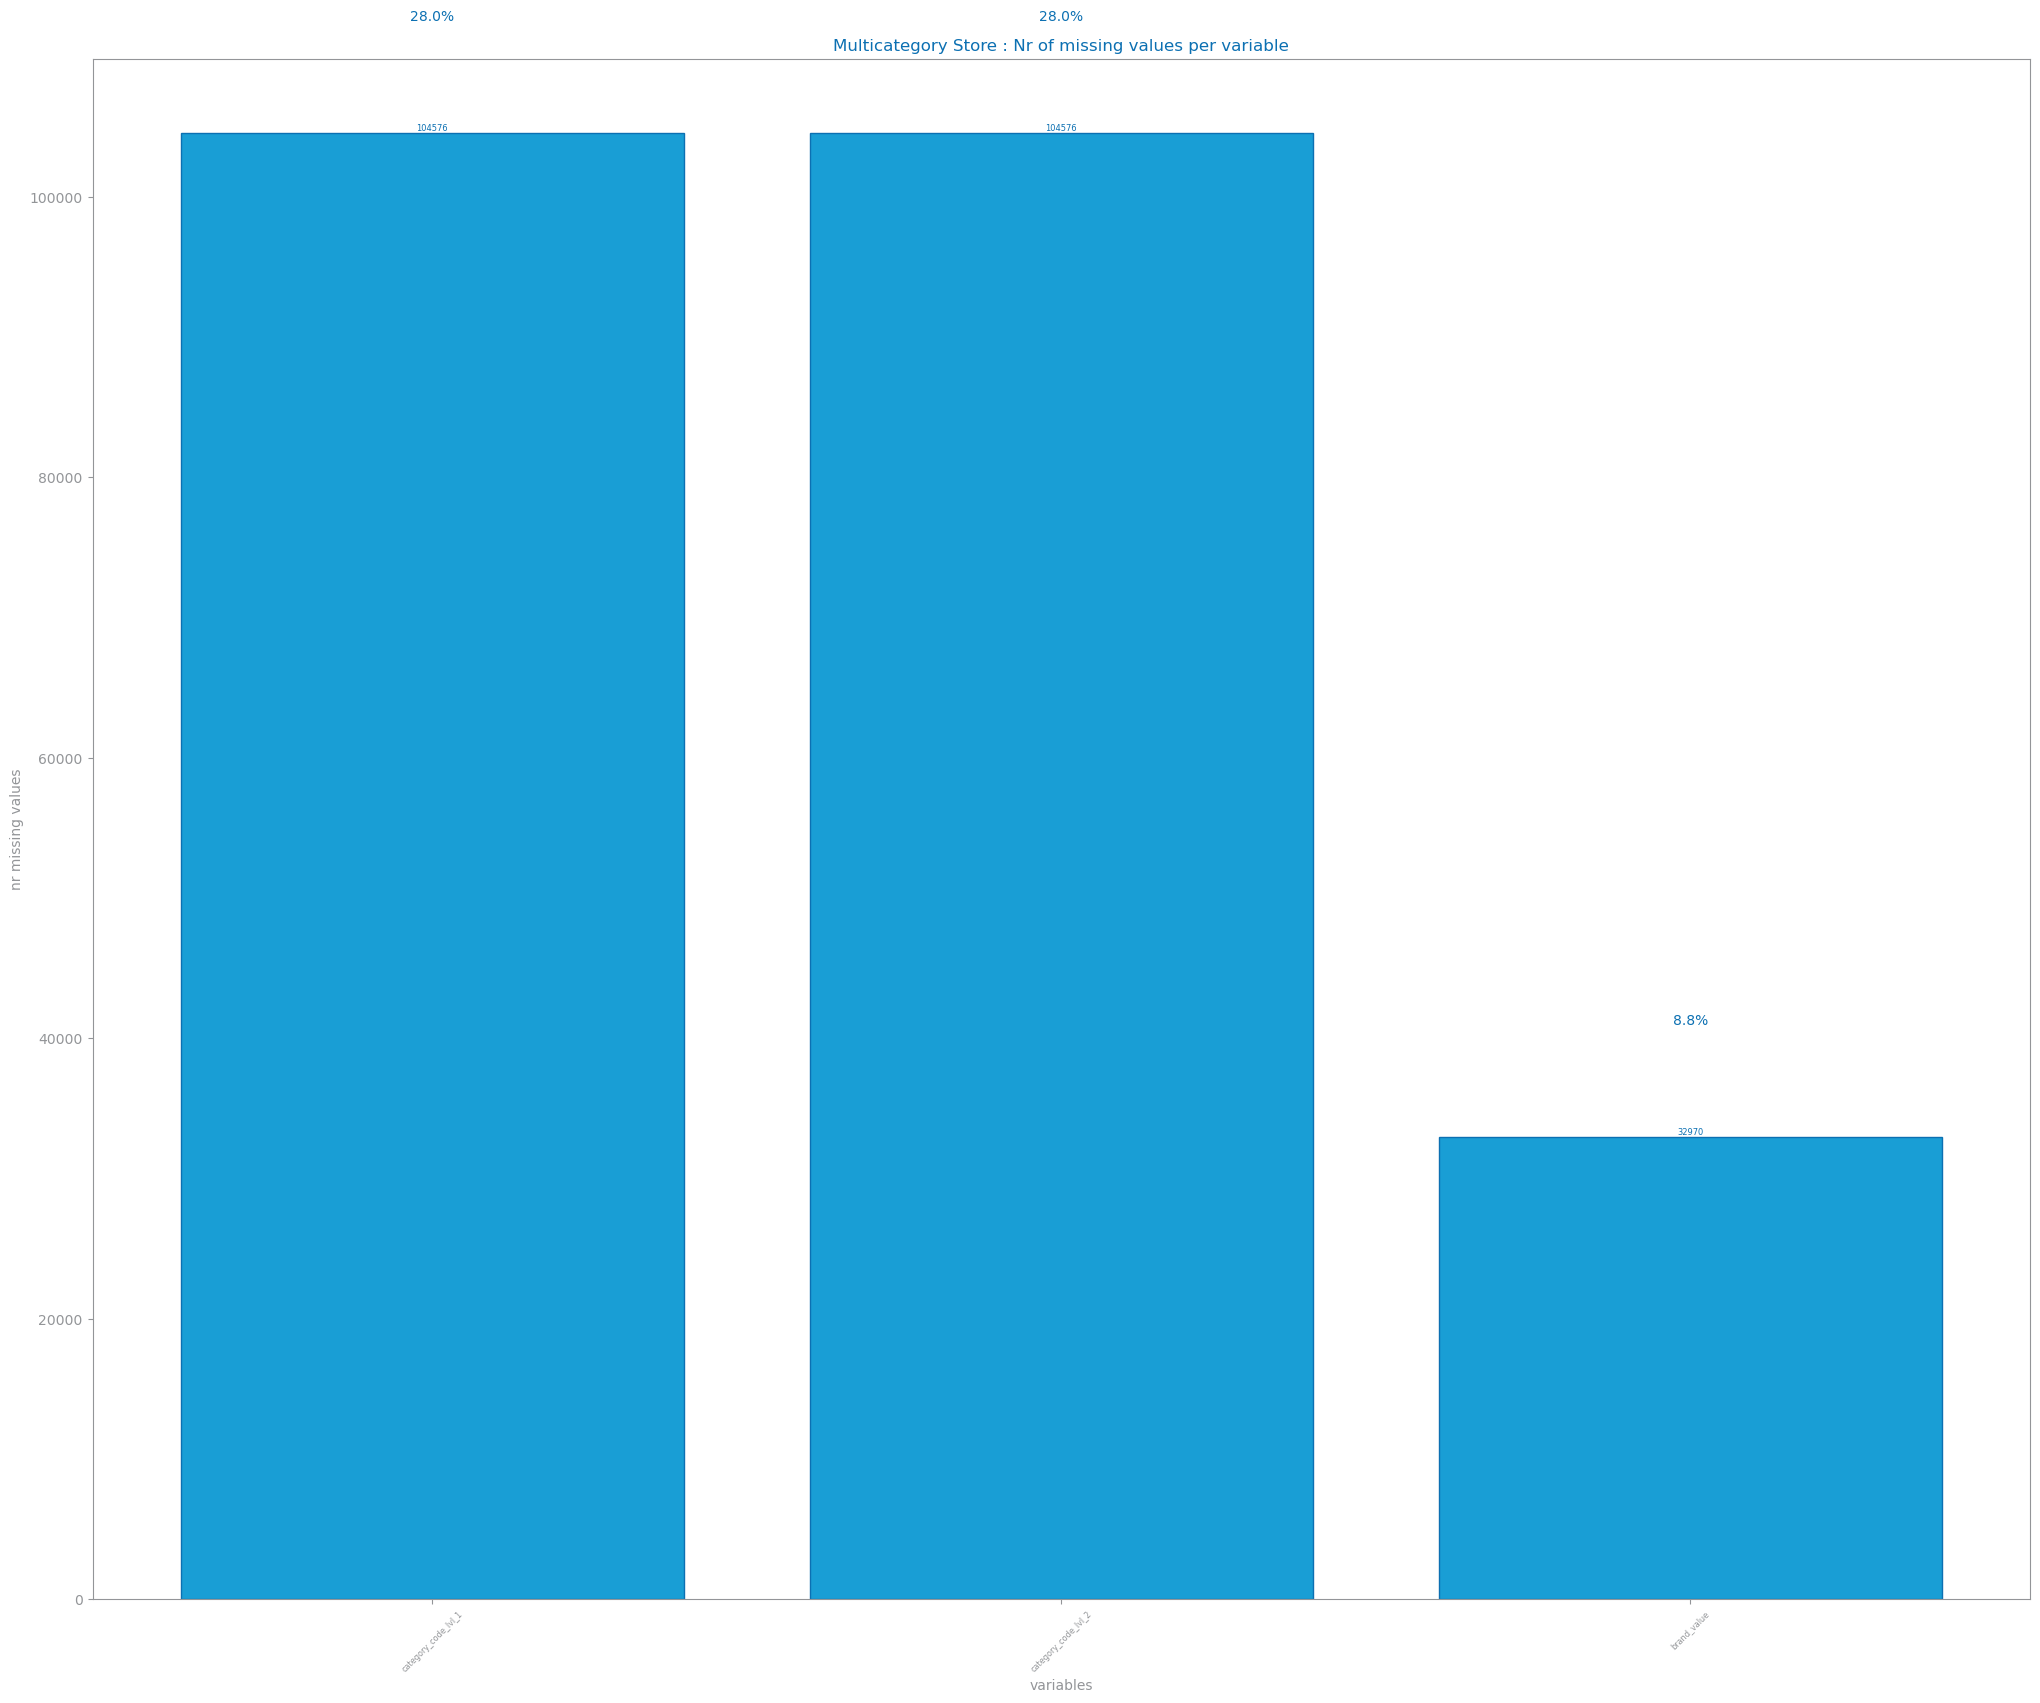

In [10]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(df)

for var in df.columns:
    nr: int = df[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 20)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} : Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

#savefig(f"./{file_tag}_mv.png")
show()

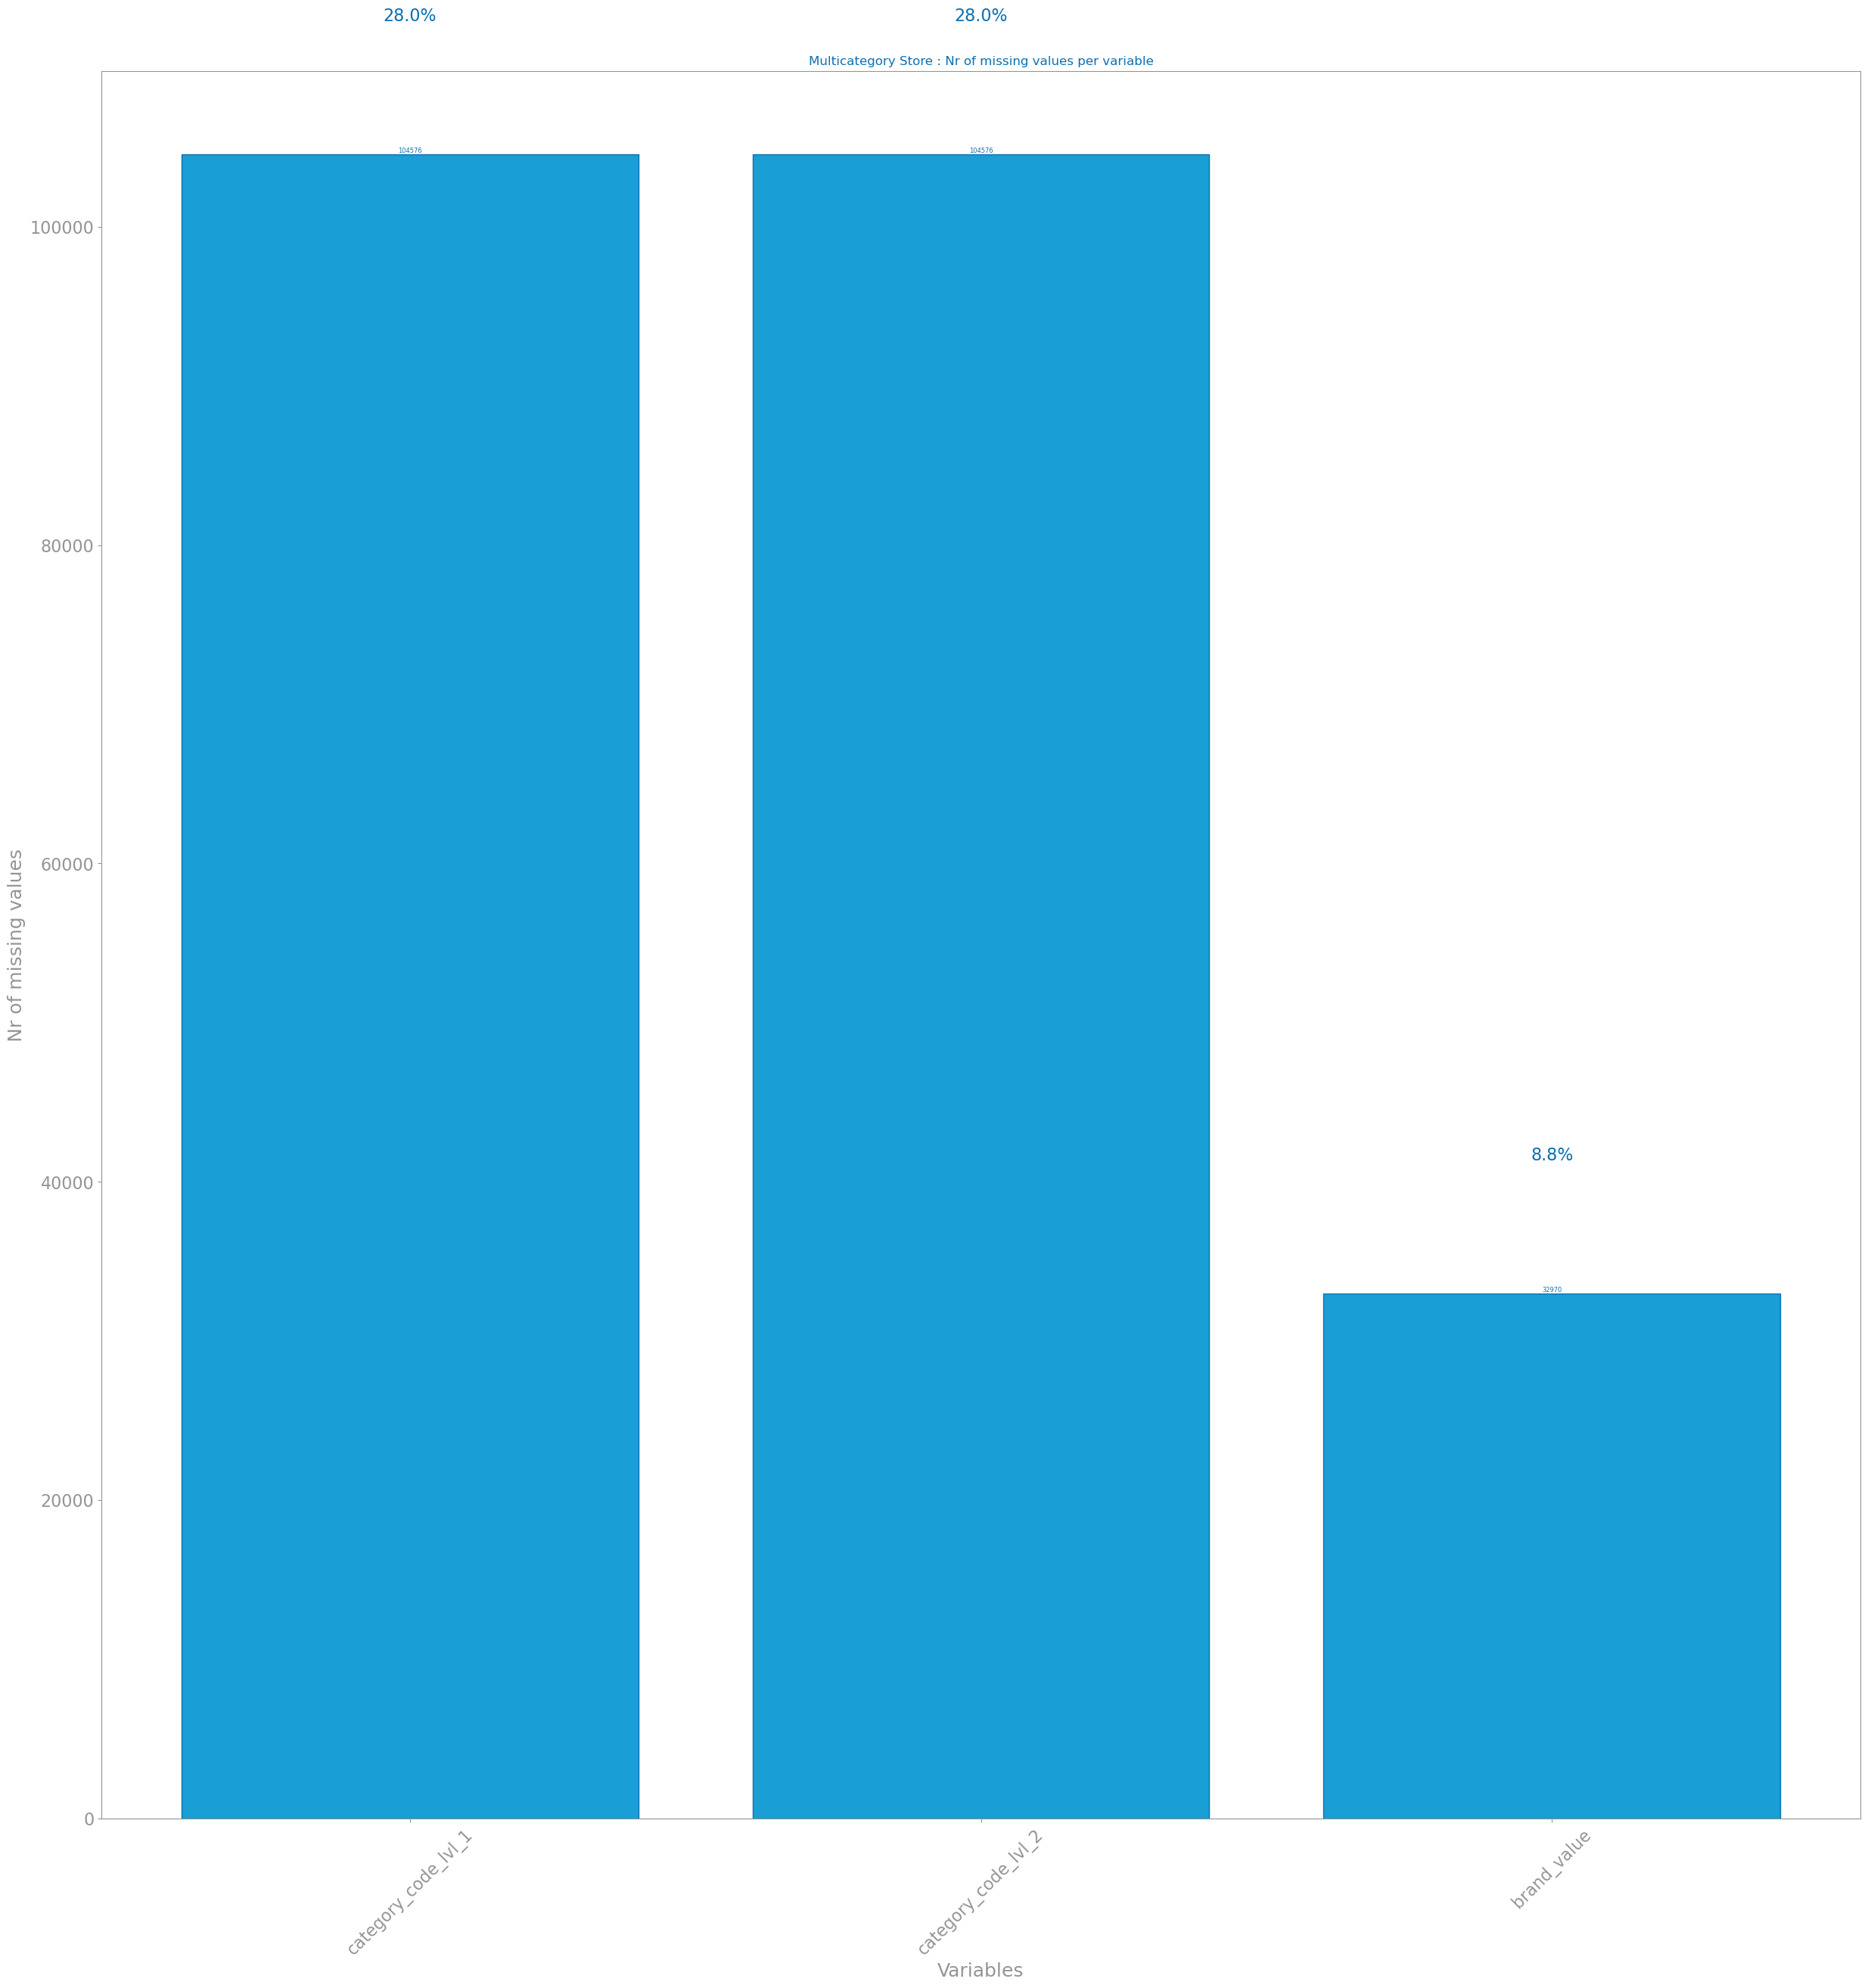

In [11]:
from matplotlib.pyplot import figure, savefig, show, xticks, yticks, xlabel, ylabel, text

mv: dict[str, int] = {}
total_rows = len(df)

for var in df.columns:
    nr: int = df[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(30, 30))  # Definir o tamanho da figura

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} : Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)

# Definir o tamanho das labels nos eixos X e Y
xticks(fontsize=16)  # Alterar o tamanho das labels do eixo X
yticks(fontsize=16)  # Alterar o tamanho das labels do eixo Y

# Ajustar o tamanho dos rótulos dos eixos
xlabel("Variables", fontsize=18)
ylabel("Nr of missing values", fontsize=18)

# Adicionar as percentagens acima das barras
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", fontsize=16)

#savefig(f"./{file_tag}_mv.png")
show()


# MV 1 - Most Frequent Srategy

## MV1 strategy aplication

In [21]:
# this script is available in data_functions originally from DSLabs site in Missing Values chapter

def apply_strategy_1(df):

    df_copy=apply_missing_values_frequent(df)

    return df_copy

df_1=apply_strategy_1(df)
df_1.describe()

,category_code_lvl_1,category_code_lvl_2,price,activity_in_session,week_of_month,day,brand_value,product_category,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos,is_purchase,is_weekend
count,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000
mean,1.045280,8.973985,290.018988,3.567087,2.986976,17.131601,304.143069,11605.488429,-0.109626,-0.203347,-0.216667,-0.051665,0.138152,-0.298832,-0.002555,-0.007213,0.150415,0.403372
std,1.919237,10.920661,337.823226,5.459302,0.885610,6.083185,238.407099,12119.339332,0.709662,0.665198,0.682651,0.696150,0.736235,0.591260,0.710002,0.704301,0.357478,0.490575
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-0.975000,-0.781000,-0.993000,-0.997000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,0.000000,3.000000,70.780000,0.000000,3.000000,15.000000,134.700000,2179.000000,-0.975000,-0.781000,-0.775000,-0.632000,-0.707000,-0.866000,-0.743000,-0.743000,0.000000,0.000000
50%,1.000000,8.000000,167.310000,2.000000,3.000000,16.000000,282.500000,4689.000000,0.000000,-0.781000,-0.081000,-0.041000,0.259000,-0.500000,0.000000,0.000000,0.000000,0.000000
75%,1.045280,8.973985,350.020000,5.000000,3.000000,20.000000,304.143069,21889.000000,0.624000,0.221000,0.000000,0.693000,0.866000,0.259000,0.743000,0.669000,0.000000,1.000000
max,12.000000,60.000000,2574.070000,209.000000,5.000000,30.000000,2213.700000,40322.000000,0.624000,1.000000,0.999000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


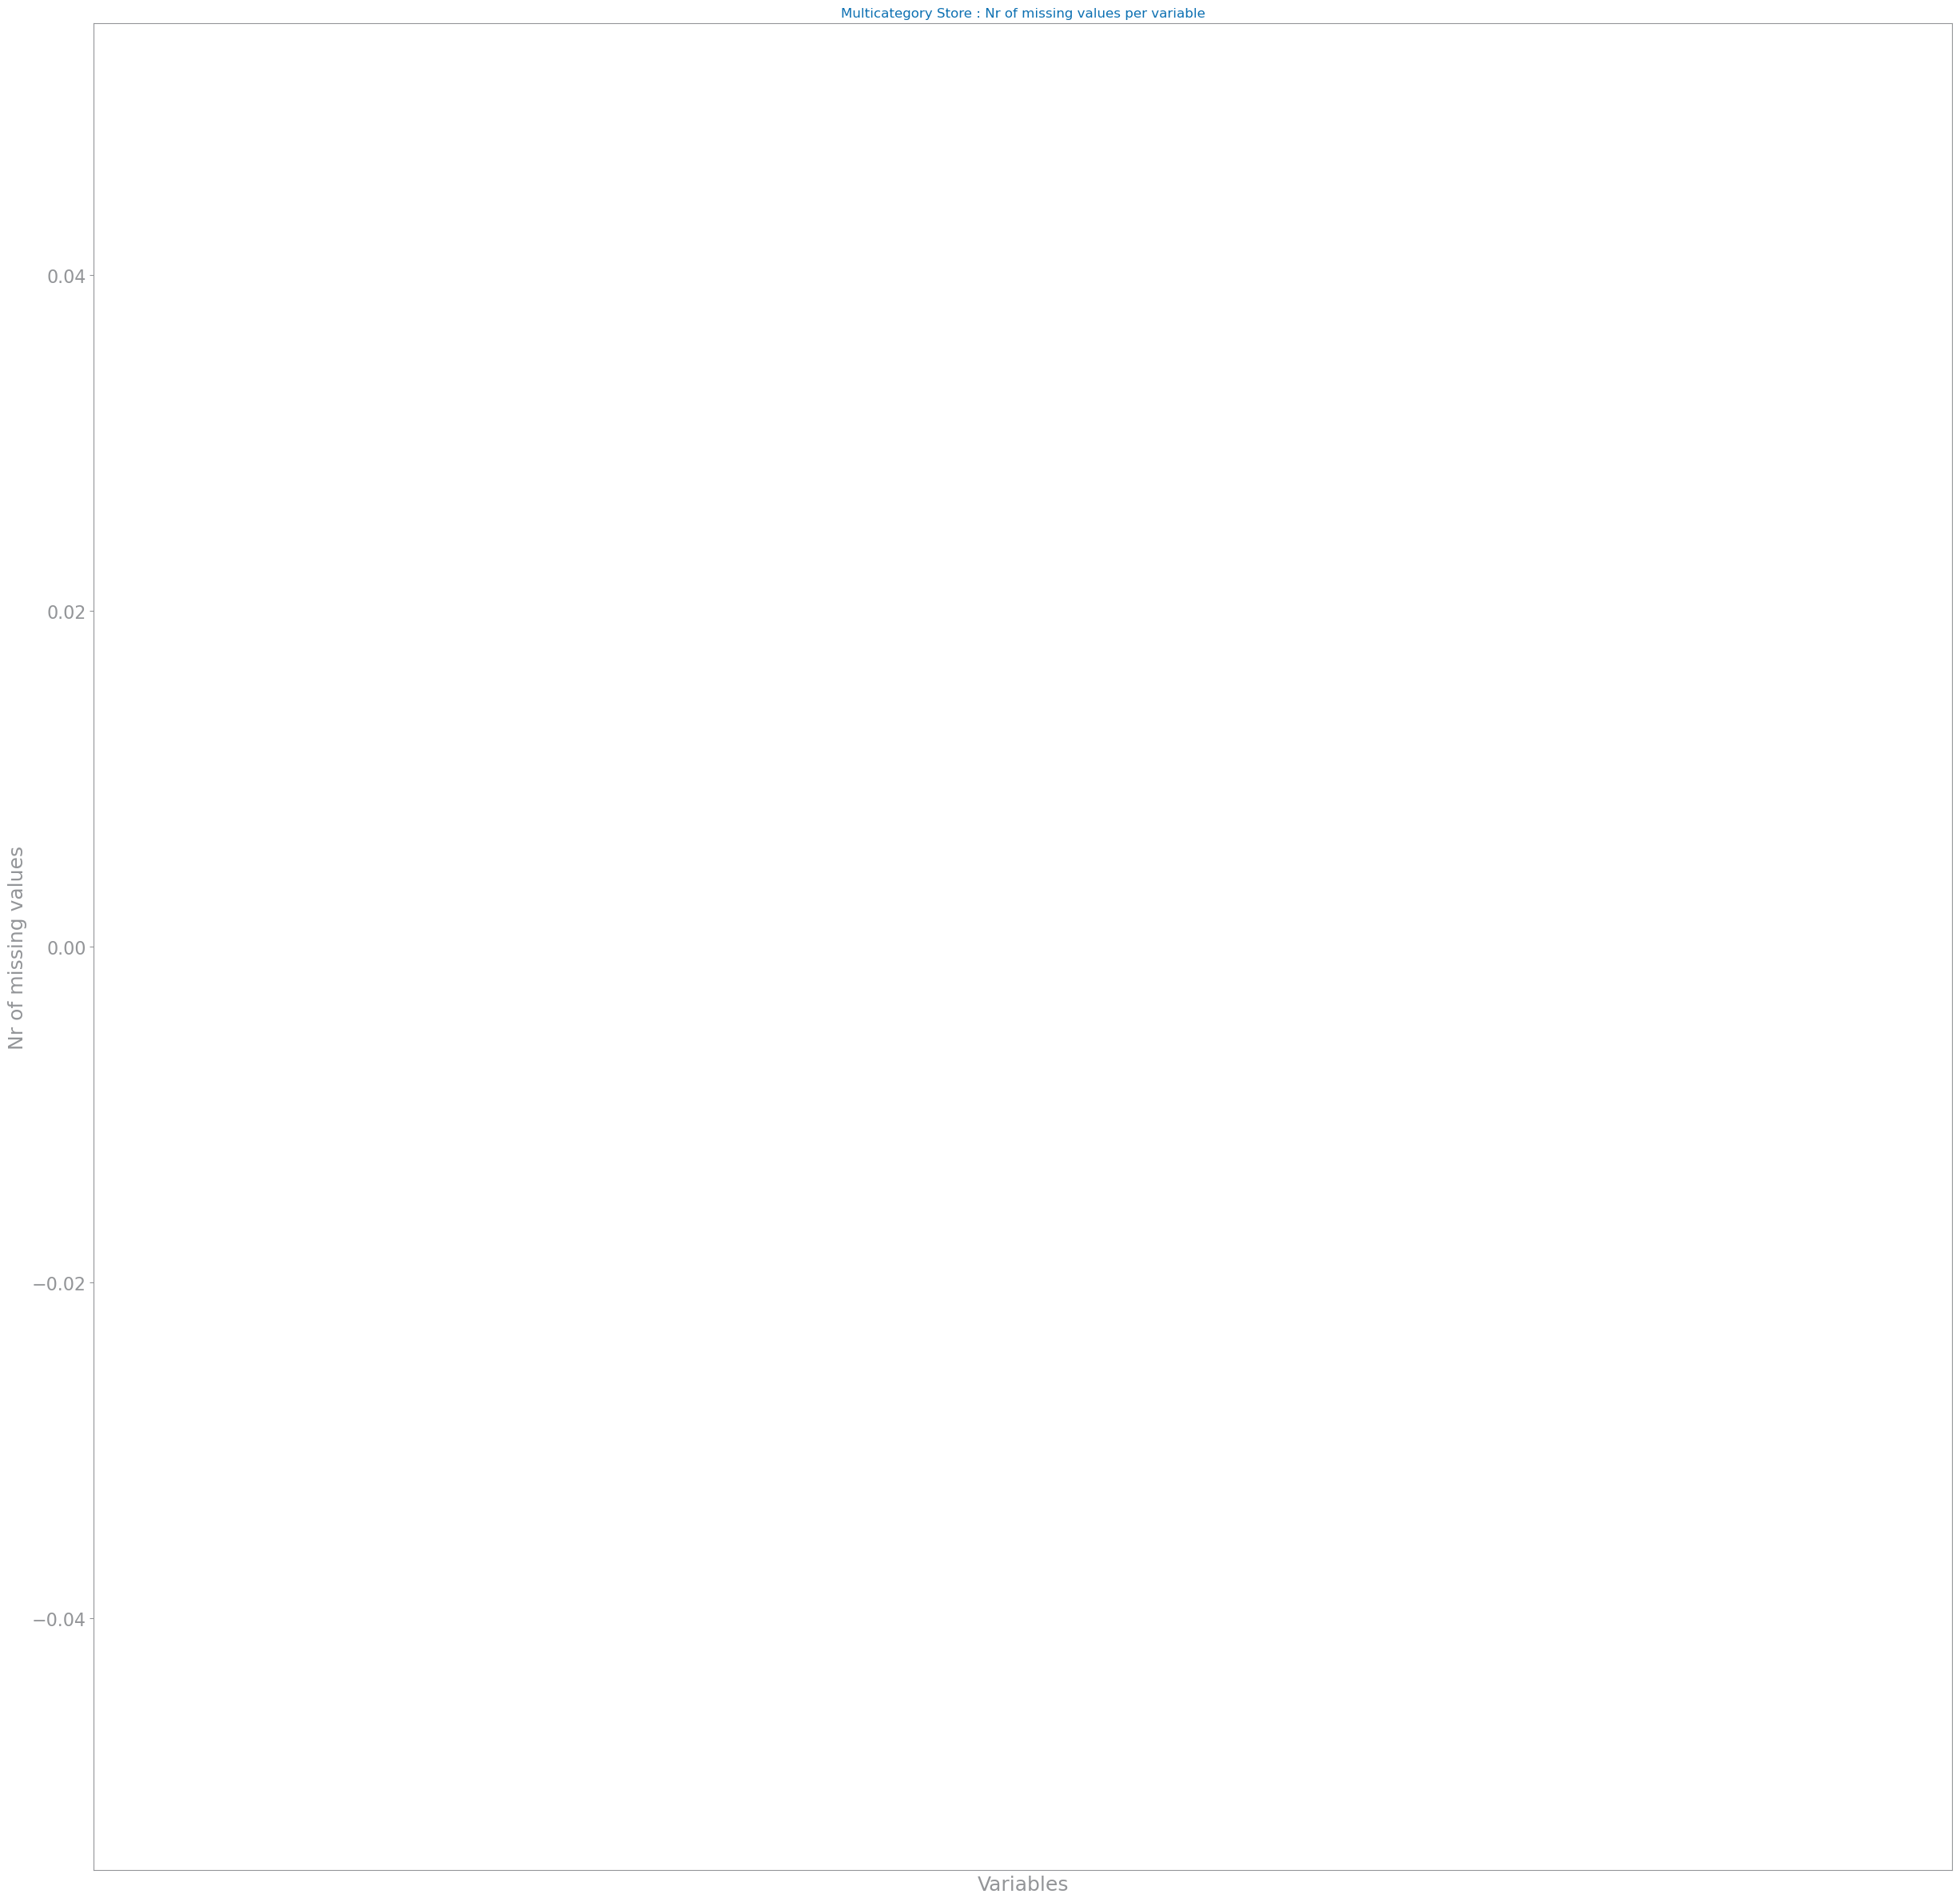

In [22]:
from matplotlib.pyplot import figure, savefig, show, xticks, yticks, xlabel, ylabel, text

mv: dict[str, int] = {}
total_rows = len(df_1)

for var in df.columns:
    nr: int = df_1[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(30, 30))  # Definir o tamanho da figura

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} : Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)

# Definir o tamanho das labels nos eixos X e Y
xticks(fontsize=16)  # Alterar o tamanho das labels do eixo X
yticks(fontsize=16)  # Alterar o tamanho das labels do eixo Y

# Ajustar o tamanho dos rótulos dos eixos
xlabel("Variables", fontsize=18)
ylabel("Nr of missing values", fontsize=18)

# Adicionar as percentagens acima das barras
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", fontsize=16)

#savefig(f"./{file_tag}_mv.png")
show()

## MV1 train/test split 

Labels=[0, 1]


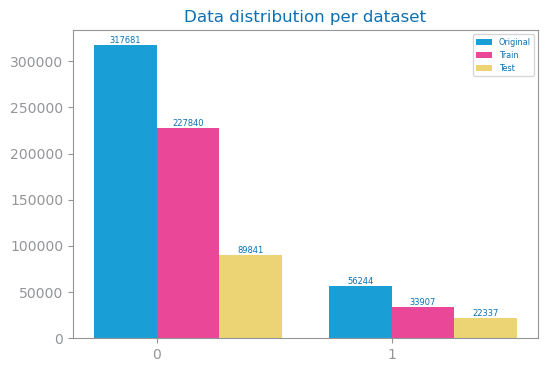

In [23]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

from numpy import array, ndarray

y_1, X_1, labels, values = define_target_and_prepare_data(df_1, target)

# Call the function to split the data
train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=df_1.columns), y_1, data_columns=df_1.columns, target_column=target)

# Distribution check
values["Train"] = [
    len(train_1[train_1[target] == 0]),
    len(train_1[train_1[target] == 1]),
]
values["Test"] = [
    len(test_1[test_1[target] == 0]),
    len(test_1[test_1[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

In [15]:
# Verificar o intervalo de dias no conjunto de treino
min_day_train = train_1['day'].min()
max_day_train = train_1['day'].max()

# Verificar o intervalo de dias no conjunto de teste
min_day_test = test_1['day'].min()
max_day_test = test_1['day'].max()

# Exibir os resultados
print(f"Train set - Min day: {min_day_train}, Max day: {max_day_train}")
print(f"Test set - Min day: {min_day_test}, Max day: {max_day_test}")


Train set - Min day: 1.0, Max day: 18.0
Test set - Min day: 18.0, Max day: 30.0


In [16]:
print("Colunas do DataFrame de treino:", train_1.columns)
print("Colunas do DataFrame de teste:", test_1.columns)

Colunas do DataFrame de treino: Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'day', 'brand_value',
       'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_weekend', 'is_purchase'],
      dtype='object')
Colunas do DataFrame de teste: Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'day', 'brand_value',
       'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_weekend', 'is_purchase'],
      dtype='object')


## MV1 evaluate

### eval target metric 2 - precision

In [24]:
print("Colunas do DataFrame de treino:", train_1.columns)
print("Colunas do DataFrame de teste:", test_1.columns)

Colunas do DataFrame de treino: Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'day', 'brand_value',
       'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_weekend', 'is_purchase'],
      dtype='object')
Colunas do DataFrame de teste: Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'day', 'brand_value',
       'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_weekend', 'is_purchase'],
      dtype='object')


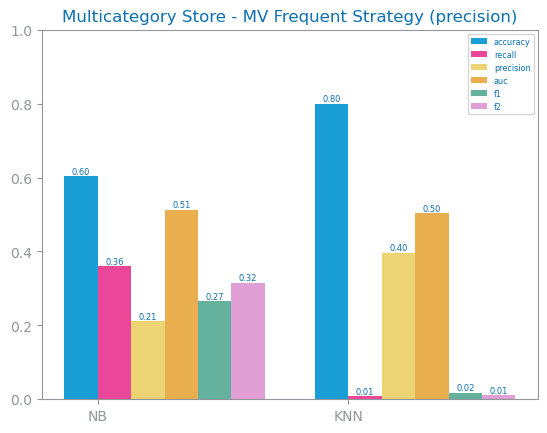

In [25]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values

figure()
eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='is_purchase', metric=target_metric_2)
plot_multibar_chart(
    ["NB", "KNN"], eval_1, title=f"{file_tag} - MV Frequent Strategy ({target_metric_2})", percentage=True
)
savefig(f"images/{file_tag}_prep_mv_approach_1_eval_{target_metric_2}.png")
show()

### eval target metric - f2

In [34]:
# this script is available in data_functions originally from DSLabs site in Missing Values chapter

def apply_strategy_1(df):

    df_copy=apply_missing_values_frequent(df)

    return df_copy

df_1=apply_strategy_1(df)
df_1.describe()

,category_code_lvl_1,category_code_lvl_2,price,activity_in_session,week_of_month,day,brand_value,product_category,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos,is_purchase,is_weekend
count,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000,373925.000000
mean,1.045280,8.973985,290.018988,3.567087,2.986976,17.131601,304.143069,11605.488429,-0.109626,-0.203347,-0.216667,-0.051665,0.138152,-0.298832,-0.002555,-0.007213,0.150415,0.403372
std,1.919237,10.920661,337.823226,5.459302,0.885610,6.083185,238.407099,12119.339332,0.709662,0.665198,0.682651,0.696150,0.736235,0.591260,0.710002,0.704301,0.357478,0.490575
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-0.975000,-0.781000,-0.993000,-0.997000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,0.000000,3.000000,70.780000,0.000000,3.000000,15.000000,134.700000,2179.000000,-0.975000,-0.781000,-0.775000,-0.632000,-0.707000,-0.866000,-0.743000,-0.743000,0.000000,0.000000
50%,1.000000,8.000000,167.310000,2.000000,3.000000,16.000000,282.500000,4689.000000,0.000000,-0.781000,-0.081000,-0.041000,0.259000,-0.500000,0.000000,0.000000,0.000000,0.000000
75%,1.045280,8.973985,350.020000,5.000000,3.000000,20.000000,304.143069,21889.000000,0.624000,0.221000,0.000000,0.693000,0.866000,0.259000,0.743000,0.669000,0.000000,1.000000
max,12.000000,60.000000,2574.070000,209.000000,5.000000,30.000000,2213.700000,40322.000000,0.624000,1.000000,0.999000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Labels=[0, 1]


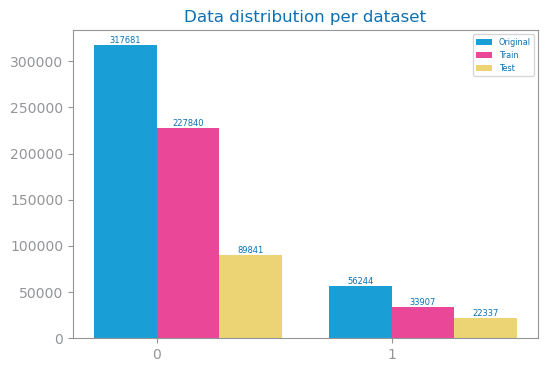

In [35]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

from numpy import array, ndarray

y_1, X_1, labels, values = define_target_and_prepare_data(df_1, target)

# Call the function to split the data
train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=df_1.columns), y_1, data_columns=df_1.columns, target_column=target)

# Distribution check
values["Train"] = [
    len(train_1[train_1[target] == 0]),
    len(train_1[train_1[target] == 1]),
]
values["Test"] = [
    len(test_1[test_1[target] == 0]),
    len(test_1[test_1[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

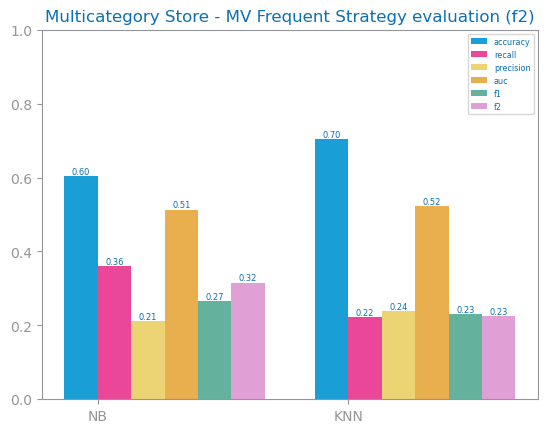

In [36]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values

figure()
eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='is_purchase', metric=target_metric)
plot_multibar_chart(
    ["NB", "KNN"], eval_1, title=f"{file_tag} - MV Frequent Strategy evaluation ({target_metric})", percentage=True
)
savefig(f"images/{file_tag}_prep_mv1_eval_{target_metric}.png")
show()

# MV2 - drop null strategy

2. Remove remaining null values records

## MV2 strategy aplication

In [37]:
# drop all rows with null values

def apply_strategy_2(df):

    df_copy=df.copy()

    df_copy = df_copy.dropna(axis=0, how="any")

    return df_copy

df_2=apply_strategy_2(df)



In [38]:
print("Dimensões antes a remoção:", df.shape)
print("Dimensões após a remoção:", df_2.shape)
df_2.head()

Dimensões antes a remoção: (373925, 18)
Dimensões após a remoção: (258334, 18)


,category_code_lvl_1,category_code_lvl_2,price,is_purchase,activity_in_session,week_of_month,is_weekend,day,brand_value,product_category,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
168812,0.0,3.0,949.47,0,3.0,1,0,1,779.2,2334,0.624,-0.781,-0.775,-0.632,0.966,0.259,-0.105,0.995
329231,0.0,3.0,254.65,1,3.0,1,0,1,213.0,2134,-0.975,0.221,-0.775,-0.632,-0.866,-0.500,-0.914,0.407
329238,0.0,0.0,17.63,0,12.0,1,0,1,17.0,429,-0.975,0.221,-0.775,-0.632,-0.866,-0.500,0.105,0.995
31957,0.0,0.0,188.94,1,2.0,1,0,1,779.2,757,0.624,-0.781,-0.775,-0.632,1.000,0.000,0.309,0.951
215804,0.0,3.0,195.06,0,3.0,1,0,1,282.5,2119,0.624,-0.781,-0.775,-0.632,0.966,0.259,-0.588,0.809


## MV2 train/test split 

Labels=[0, 1]


<Axes: title={'center': 'Data distribution per dataset'}>

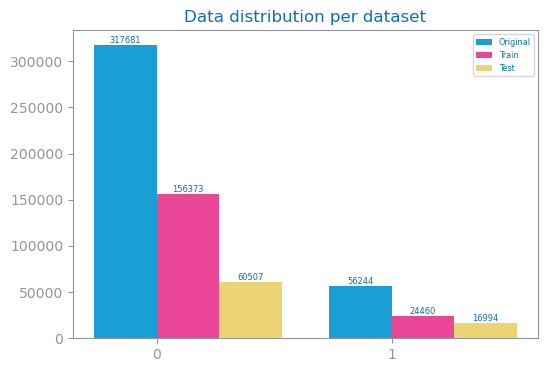

In [39]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

# train/test split from DSLABS Classification/Evaluation Chapter
# created split_data_save_csv on data_functions

# Call the function to split the data
y_2, X_2, labels, class_counts = define_target_and_prepare_data(df_2, target=target)


train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=df_2.columns), y_2, data_columns=df_2.columns, target_column=target)


values["Train"] = [
    len(train_2[train_2[target] == 0]),
    len(train_2[train_2[target] == 1]),
]
values["Test"] = [
    len(test_2[test_2[target] == 0]),
    len(test_2[test_2[target] == 1]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

In [40]:
# Verificar o intervalo de dias no conjunto de treino
min_day_train = train_2['day'].min()
max_day_train = train_2['day'].max()

# Verificar o intervalo de dias no conjunto de teste
min_day_test = test_2['day'].min()
max_day_test = test_2['day'].max()

# Exibir os resultados
print(f"Train set - Min day: {min_day_train}, Max day: {max_day_train}")
print(f"Test set - Min day: {min_day_test}, Max day: {max_day_test}")

Train set - Min day: 1.0, Max day: 18.0
Test set - Min day: 18.0, Max day: 30.0


## MV2 evaluate

### optimize for target_metric 2 - precision

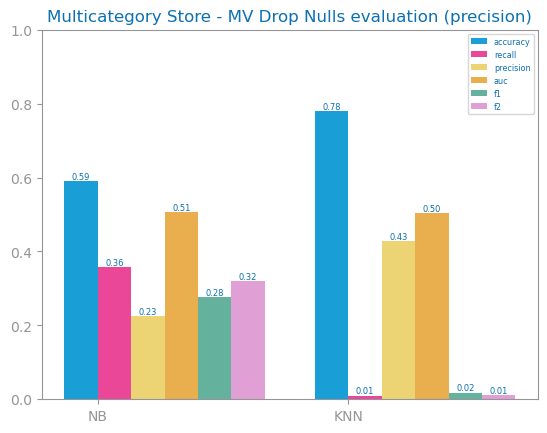

In [41]:
figure()
eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='is_purchase', metric=target_metric_2)
plot_multibar_chart(
    ["NB", "KNN"], eval_2, title=f"{file_tag} - MV Drop Nulls evaluation ({target_metric_2})", percentage=True
)
savefig(f"images/{file_tag}_prep_mv2_evaluation_{target_metric}.png")
show()

### optimize for metric 2 - f2

In [46]:
# drop all rows with null values

def apply_strategy_2(df):

    df_copy=df.copy()

    df_copy = df_copy.dropna(axis=0, how="any")

    return df_copy

df_2=apply_strategy_2(df)

Labels=[0, 1]


<Axes: title={'center': 'Data distribution per dataset'}>

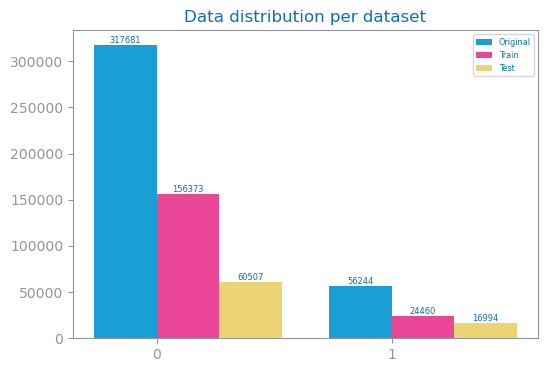

In [47]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

# train/test split from DSLABS Classification/Evaluation Chapter
# created split_data_save_csv on data_functions

# Call the function to split the data
y_2, X_2, labels, class_counts = define_target_and_prepare_data(df_2, target=target)


train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=df_2.columns), y_2, data_columns=df_2.columns, target_column=target)


values["Train"] = [
    len(train_2[train_2[target] == 0]),
    len(train_2[train_2[target] == 1]),
]
values["Test"] = [
    len(test_2[test_2[target] == 0]),
    len(test_2[test_2[target] == 1]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

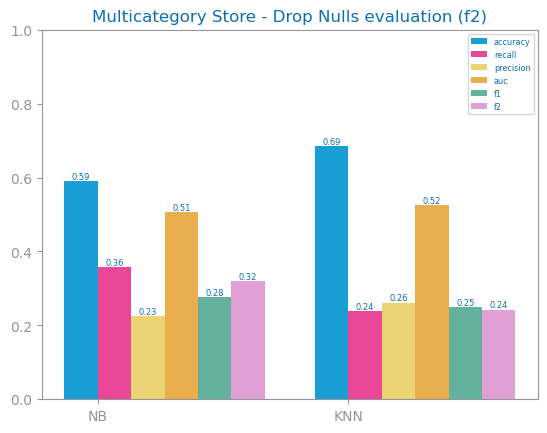

In [48]:
figure()
eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='is_purchase', metric=target_metric)
plot_multibar_chart(
    ["NB", "KNN"], eval_2, title=f"{file_tag} - Drop Nulls evaluation ({target_metric})", percentage=True
)
savefig(f"images/{file_tag}_prep_mv2_eval_{target_metric}.png")
show()

## uplift df

In [49]:
algorithms = ['Naive Bayes', 'KNN']

# Create DataFrames for eval_1 and eval_2
df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

# Calculate uplift
df_uplift = df_eval_2 - df_eval_1



# Combine everything into one DataFrame (without misalignment issues)
comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



# Display the DataFrame
comparison_df

Approach 1                                                   \
              accuracy    recall precision      auc        f1        f2   
Naive Bayes   0.604281  0.360299  0.210957  0.51262  0.266107  0.315613   
KNN           0.703302  0.222098  0.237732  0.52252  0.229649  0.225058   

            Approach 2                                                   \
              accuracy    recall precision       auc       f1        f2   
Naive Bayes   0.589631  0.356773  0.225089  0.505902  0.27603  0.319401   
KNN           0.685062  0.238614  0.261208  0.524533  0.24940  0.242814   

              Uplift                                                    
            accuracy    recall precision       auc        f1        f2  
Naive Bayes -0.01465 -0.003526  0.014132 -0.006718  0.009923  0.003788  
KNN         -0.01824  0.016516  0.023476  0.002012  0.019751  0.017756

## t test

In [50]:

from scipy.stats import ttest_rel


# Perform paired t-tests for each metric
t_test_results = {'t_stat': [], 'p_value': []}
for metric in eval_1.keys():
    t_stat, p_value = ttest_rel(df_eval_1[metric], df_eval_2[metric])
    t_test_results['t_stat'].append(t_stat)
    t_test_results['p_value'].append(p_value)

# Create DataFrame for t-test results
df_ttest = pd.DataFrame(t_test_results, index=eval_1.keys())

# Convert t-test results to a DataFrame with MultiIndex and concatenate it
df_ttest_multi = pd.DataFrame({
    ('t_test', 't_stat'): df_ttest['t_stat'],
    ('t_test', 'p_value'): df_ttest['p_value']
})

df_ttest_multi

t_test          
             t_stat   p_value
accuracy   9.160944  0.069219
recall    -0.648128  0.633906
precision -4.025005  0.155027
auc        0.538995  0.685284
f1        -3.019450  0.203602
f2        -1.542432  0.366182

# Analysis

Comparing mv approaches:
- Despite not having statisic significce, becasue pv alues is above 0,005, there is an uplift in approach 2 regarding precision (app1 - 0,21 & 0,39; app2 - 0,22 & 0,42) which is our focus. We also should be worried about accuracy.

Decision:
- we will move forward with approach 2 for missing values due to slightly better results for precision


## UPDATE
- sample on 10% now
- focus on precision and accuracy. recall should be lifted after balancing

# save to csv

In [59]:
if test_data==False:
    

    data_save=df.copy()

    # apply winning strategy
    data_save=apply_strategy_2(data_save)
        
    data_save.to_csv(f"dataset/df_ecom_2_2_mv_input.csv", index=False)
    
    print(data_save.columns)
    

Index(['category_code_lvl_1', 'category_code_lvl_2', 'price', 'is_purchase',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos'],
      dtype='object')


## train test csv

In [60]:
if test_data==False:
    

    data_save_copy=data_save.copy()

    
    y, X, labels, class_counts = define_target_and_prepare_data(data_save_copy, target=target)

    train, test = split_data_save_csv(pd.DataFrame(X, columns=data_save_copy.columns), y, data_columns=data_save_copy.columns, target_column=target)  
    
    train.to_csv(f"dataset/df_ecom_2_2_mv_input_train.csv", index=False)
    print(train.columns)
    
    test.to_csv(f"dataset/df_ecom_2_2_mv_input_test.csv", index=False)
    print(test.columns)

Labels=[0, 1]
Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_purchase'],
      dtype='object')
Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_purchase'],
      dtype='object')
